# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from scipy import stats
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
roll_dice = [1,2,3,4,5,6]

def dice(n):
    return [random.choice(roll_dice) for i in range(n)]

results = dice(10)
results

[6, 5, 2, 6, 6, 2, 5, 6, 2, 5]

In [3]:
dice_roll = pd.DataFrame(results,columns=['outcome'])
dice_roll

,outcome
0,6
1,5
2,2
3,6
4,6
5,2
6,5
7,6
8,2
9,5


#### 2.- Plot the results sorted by value.

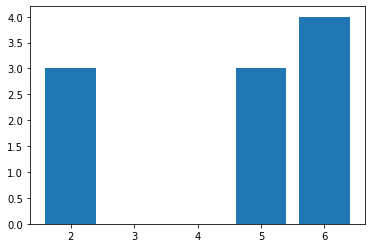

In [4]:
sort_results = np.sort(results)
keys, counts = np.unique(sort_results, return_counts=True)

plt.bar(keys, counts)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

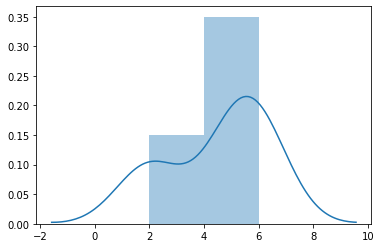

In [5]:
sb.distplot(results)

In [6]:
"""
The frequency distribution also shows x (which will vary with results) as the top result in the dice roll.
However the other numbers are not acurate as the edge are compressed to display the frequency
"""

'\nThe frequency distribution also shows x (which will vary with results) as the top result in the dice roll.\nHowever the other numbers are not acurate as the edge are compressed to display the frequency\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
mean_dice = (np.sum(results))/len(results)
mean_dice

4.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def freq(results):
    freq_d = {}
    for i in results:
        if freq_d.get(i):
            freq_d[i] += 1
        else:
            freq_d[i] = 1
    return freq_d
freq_dic = freq(results)
freq_dic

{6: 4, 5: 3, 2: 3}

In [9]:
mean_dic = sum(k*v for k,v in freq_dic.items())/len(results)
mean_dic

4.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
#if we have an even number of observations the median will be calculated one way, if odd then another

print(sort_results)

[2 2 2 5 5 5 6 6 6 6]


In [11]:
def med_func(sorted_list):
    
    if len(sorted_list)%2 == 0:
        return (len(sorted_list)/2 + len(sorted_list)/2-1) / 2
    else:
        return  len(sorted_list) / 2

med_func(sort_results)

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
# your code here

def quartiles(sorted_list):
    
    q1 = len(sorted_list) * 0.25
    q2 = med_func(sorted_list)
    q3 = len(sorted_list) * 0.75
    q4 = len(sorted_list)
    
    return q1,q2,q3,q4

quartiles(sort_results)

(2.5, 4.5, 7.5, 10)

In [13]:
#confirming what I do from now
dice_roll.describe()

#will need to round to integers and get the values for the list index

,outcome
count,10.000000
mean,4.500000
std,1.779513
min,2.000000
25%,2.750000
50%,5.000000
75%,6.000000
max,6.000000


In [14]:
def quartiles(sorted_list,quartile):
    #getting the values to the corresponding index (googled quite a lot for this one)
    quartile_value = sorted_list[round((len(sorted_list)+1) * quartile)-1]
    return quartile_value

q1 = quartiles(sort_results, 0.25)
print("Q1 = ",q1)
q2 = quartiles(sort_results, 0.50)
print("Q2 = ",q2)
q3 = quartiles(sort_results, 0.75)
print("Q3 = ",q3)

#can not get an accurate value (float) when indexing the list of results, 
#hoping to get some feedback on how to solve this


Q1 =  2
Q2 =  5
Q3 =  6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [18]:
# your code here
roll_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_100.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [19]:
sorted_rolls = roll_100.sort_values('value')
sorted_rolls

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


In [32]:
cummulative1 = sorted_rolls['value'].value_counts()
cummulative2 = pd.DataFrame(cummulative1)
cummulative = cummulative2.rename_axis('face')
cummulative

,value
face,
6,23
4,22
2,17
3,14
5,12
1,12


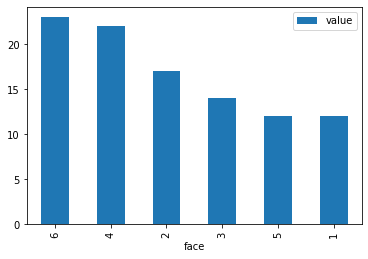

In [36]:
cummulative.plot.bar()

In [22]:
"""
I see that in this dice roll set, the faces 6 and 4 were most present. 5 and 1 less.
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [39]:
# your code here
mean_dice = (np.sum(sorted_rolls['value']))/len(sorted_rolls['value'])
mean_dice

3.74

In [42]:
sorted_rolls['value'].describe()

count    100.000000
mean       3.740000
std        1.703354
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: value, dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [44]:
# your code here
freq(sorted_rolls['value'])

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

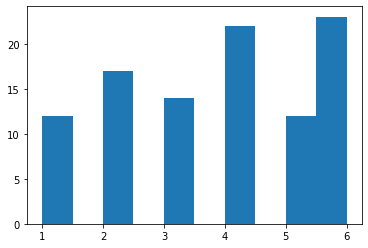

In [46]:
# your code here
plt.hist(sorted_rolls['value'])

In [ ]:
"""
This is clearly not a normal distribution, we confirm that the values are higher for 4 and 6
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [50]:
# your code here

roll_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_1000.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

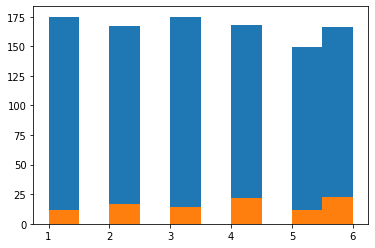

In [52]:
plt.hist(roll_1000['value'])
plt.hist(sorted_rolls['value'])

In [ ]:
"""
the distribution is more balanced, since this is a random event equal probability for each result we can expect that 
the more we throw the dice the more likely we will have similar results
"""

In [53]:
# your code here

ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


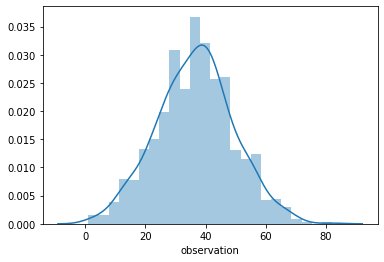

In [61]:
freq(ages_population['observation'])
sb.distplot(ages_population['observation'])

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [68]:
# your code here
mean = ages_population['observation'].mean()
std = ages_population['observation'].std()

print("the mean for the age observations is of ", mean, " and the standard deviation of ", std )

the mean for the age observations is of  36.56  and the standard deviation of  12.816499625976762


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [62]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


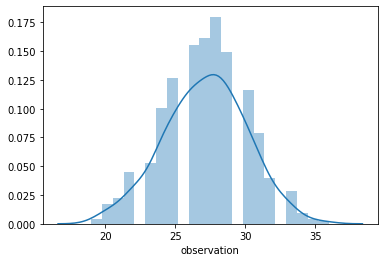

In [64]:
freq(ages_population2['observation'])
sb.distplot(ages_population2['observation'])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, the distribution is flatter and the mean/center is around the 27 observation value
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [67]:
# your code here
mean2 = ages_population2['observation'].mean()
std2 = ages_population2['observation'].std()

print("the mean for the age observations is of ", mean2, " and the standard deviation of ", std2 )

the mean for the age observations is of  27.155  and the standard deviation of  2.969813932689186


In [ ]:
"""
For this observation, the average age is of 27 years old with a deviation of 2.9.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [69]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

the mean for the age observations is of  41.989  and the standard deviation of  16.144705959865934


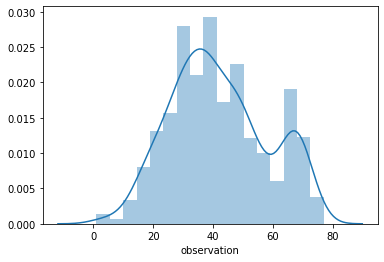

In [70]:
# your code here
mean3 = ages_population3['observation'].mean()
std3 = ages_population3['observation'].std()

print("the mean for the age observations is of ", mean3, " and the standard deviation of ", std3 )
sb.distplot(ages_population3['observation'])

In [ ]:
"""
Here we have a second larger accumulation of values around the 60-70 years of age that denormalize the
distribution and will move the mean to the right of the median.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [72]:
# your code here
q1 = np.quantile(ages_population3['observation'], 0.25)
q2 = np.quantile(ages_population3['observation'], 0.50)
q3 = np.quantile(ages_population3['observation'], 0.75)
q4 = np.quantile(ages_population3['observation'], 1.00)

print("quartile 1 = ", q1)
print("quartile 2 = ", q2)
print("quartile 3 = ", q3)
print("quartile 4 = ", q4)

quartile 1 =  30.0
quartile 2 =  40.0
quartile 3 =  53.0
quartile 4 =  77.0


In [73]:
#confirming results above
ages_population3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
"""
This confirms that the mean was slightly moved to the right as the q2 value (median) is 40 and the mean is 41.
But the shift is not great which indicates that the cluster of density in those values is not of large significance
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b064cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b0676d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b064090>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b064d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b06d650>],
 'means': []}

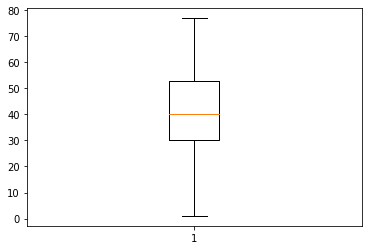

In [74]:
# your code here
plt.boxplot(ages_population3['observation'])

<function matplotlib.pyplot.show(*args, **kw)>

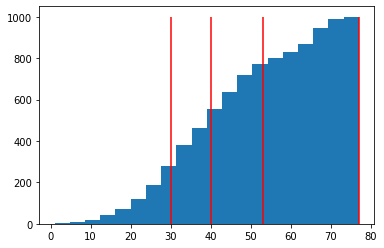

In [80]:
plt.hist(ages_population3['observation'], bins = 20, cumulative = True)
plt.vlines([q1,q2,q3,q4],0, 1000, colors = 'r')
plt.show

In [ ]:
"""
The boxplot shows no major discrepancies/events in the distribution, and the histogram shows a larger 
interquartile range between q3 and q4 
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""